# Data Preporcessing

## Mounting the Drive (Google Colab)

In [ ]:
from google.colab import drive

drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## Importing The Packages

In [ ]:
import numpy as np
import pandas as pd

pd.options.display.max_rows = 15
np.set_printoptions(precision=4, suppress=True)

# Creates a progress bar for pandas functions
from tqdm import tqdm

tqdm.pandas()

# Filter out the irrelevant warnings
import warnings

# Used for resolving paths
from pathlib import Path

warnings.filterwarnings("ignore")

# Plotting
import matplotlib.pyplot as plt

%matplotlib inline
import seaborn as sns

sns.set_theme()

## Resolving Paths

In [ ]:
cur_dir = (
    Path().resolve()
)  # this should provide you with the folder in which this notebook is placed

### Google Colab

In [ ]:
# use this for colab
gdrive_path_to_datasets = Path.joinpath(
    cur_dir, "gdrive/Shareddrives/Minecraft/Datasets"
)
print(gdrive_path_to_datasets)
print("Does path exist? ->", Path.exists(gdrive_path_to_datasets))

path_to_datasets = gdrive_path_to_datasets

/content/gdrive/Shareddrives/Minecraft/Datasets
Does path exist? -> True


### Local Repository

In [ ]:
# use this for local repository
local_path_to_datasets = Path.joinpath(cur_dir, "datasets")
print(local_path_to_datasets)
print("Does path exist? ->", Path.exists(local_path_to_datasets))

path_to_datasets = local_path_to_datasets

In [ ]:
# same for colab and local repository
path_yelp_zip = Path.joinpath(path_to_datasets, "YelpZip")
print(path_yelp_zip)
print("Does path exist? ->", Path.exists(path_yelp_zip))

/content/gdrive/Shareddrives/Minecraft/Datasets/YelpZip
Does path exist? -> True


## Processing The Data

### Importing The Data

In [ ]:
rev_content = pd.read_table(Path.joinpath(path_yelp_zip, "reviewContent"), sep="\t")
rev_content.columns = ["userID", "productID", "date", "review"]
rev_content.head()

,userID,productID,date,review
0,5045,0,2014-09-08,This was the worst experience I've ever had a ...
1,5046,0,2013-10-06,This is located on the site of the old Spruce ...
2,5047,0,2014-11-30,I enjoyed coffee and breakfast twice at Toast ...
3,5048,0,2014-08-28,I love Toast! The food choices are fantastic -...
4,5049,0,2013-07-16,The egg on an English muffin (their take on eg...


In [ ]:
metadata = pd.read_table(Path.joinpath(path_yelp_zip, "metadata"), sep="\t")
metadata.columns = ["userID", "productID", "rating", "label", "date"]
metadata.head()

,userID,productID,rating,label,date
0,5045,0,1.0,-1,2014-09-08
1,5046,0,3.0,-1,2013-10-06
2,5047,0,5.0,-1,2014-11-30
3,5048,0,5.0,-1,2014-08-28
4,5049,0,5.0,-1,2013-07-16


In [ ]:
product_map = pd.read_table(Path.joinpath(path_yelp_zip, "productIdMapping"), sep="\t")
product_map.columns = ["name", "productID"]
product_map.head()

,name,productID
0,Big Apple Lounge & Restaurant,1
1,La Carreta,2
2,Just Subs 6,2780
3,Formosa Asian Fusion Restaurant,4
4,Dona Mercedes,5


In [ ]:
user_map = pd.read_table(Path.joinpath(path_yelp_zip, "userIdMapping"), sep="\t")
user_map.columns = ["name", "userID"]
user_map.head()

,name,userID
0,FzbqZaNONgR-b5iHpoGp8Q,185064
1,F1n8h7MtVHPxgY4U1iQ-bQ,205085
2,sd00TiP5ENkm6rKYPn3p3A,38645
3,9-QHBM5i9--nUYrrj9DXXA,133524
4,FBjIChlJ437HqVe134bCVw,41313


In [ ]:
graph = pd.read_table(Path.joinpath(path_yelp_zip, "reviewGraph"), sep="\t")
graph.columns = ["userID", "productID", "rating"]
graph.head()

,userID,productID,rating
0,5045,0,1.0
1,5046,0,3.0
2,5047,0,5.0
3,5048,0,5.0
4,5049,0,5.0


### Merging All The Parts of The Dataset Together

In [ ]:
# left join metadata with review content=
merged_zip = pd.merge(
    metadata, rev_content, on=["userID", "productID", "date"], how="left"
)
merged_zip.head()

,userID,productID,rating,label,date,review
0,5045,0,1.0,-1,2014-09-08,This was the worst experience I've ever had a ...
1,5046,0,3.0,-1,2013-10-06,This is located on the site of the old Spruce ...
2,5047,0,5.0,-1,2014-11-30,I enjoyed coffee and breakfast twice at Toast ...
3,5048,0,5.0,-1,2014-08-28,I love Toast! The food choices are fantastic -...
4,5049,0,5.0,-1,2013-07-16,The egg on an English muffin (their take on eg...


Indetify empty reviews and remove them if any are found

In [ ]:
merged_zip.isna().sum()

userID         0
productID      0
rating         0
label          0
date           0
review       140
dtype: int64

In [ ]:
merged_zip.dropna(inplace=True)

Analyze the star rating proportions

In [ ]:
star_rating_counts = merged_zip.rating.value_counts()
star_rating_counts

5.0    229364
4.0    217400
3.0     83117
2.0     42982
1.0     35594
Name: rating, dtype: int64

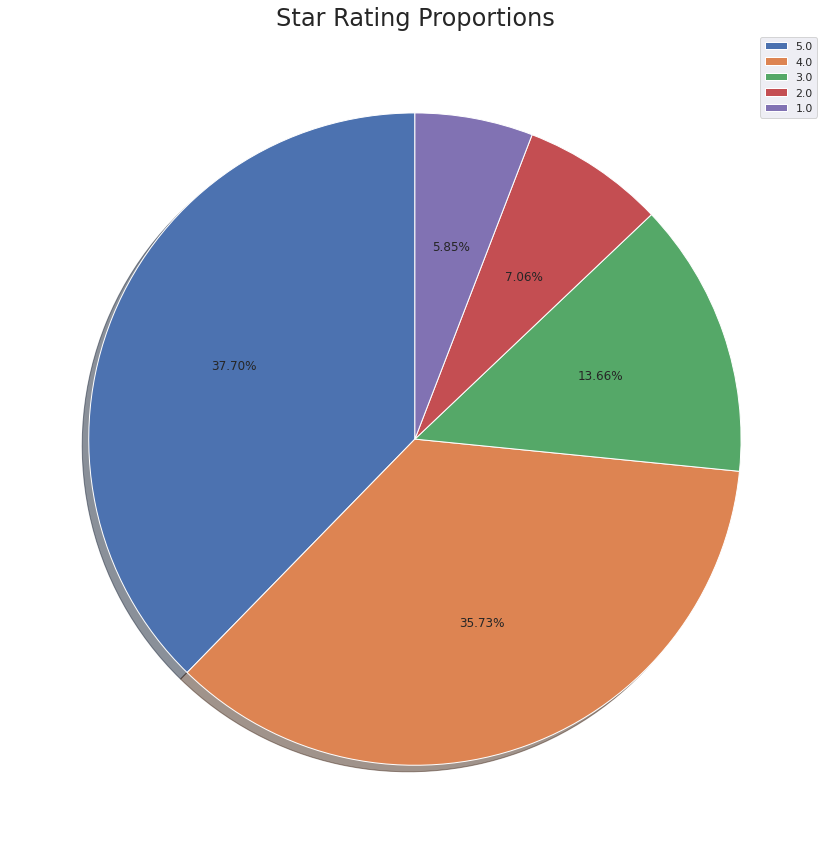

In [ ]:
# add a threshold to the series object to cutoff the genres that have less than 1% frequency
plt.figure(figsize=(15, 15))
plt.title("Star Rating Proportions", fontsize=24)
plt.pie(star_rating_counts.values, startangle=90, autopct="%1.2f%%", shadow=True)
plt.legend(star_rating_counts.index, loc="upper right")
plt.show()

**Note that in the dataset in the label column:**
<br>
**<br>&nbsp;1 --> Real**
**<br>-1 --> Fake**

In [ ]:
label_counts = merged_zip.label.value_counts()
label_counts

 1    528019
-1     80438
Name: label, dtype: int64

In [ ]:
fake_label_percentage = label_counts.loc[-1] / label_counts.sum()
fake_label_percentage

0.13219997469007672

In [ ]:
real_label_percentage = label_counts.loc[1] / label_counts.sum()
real_label_percentage

0.8678000253099233

Encode star ratings into sentiment labels

In [ ]:
merged_zip["sentiment label"] = merged_zip["rating"].apply(lambda x: 0 if x <= 3 else 1)
merged_zip.head()

,userID,productID,rating,label,date,review,sentiment label
0,5045,0,1.0,-1,2014-09-08,This was the worst experience I've ever had a ...,0
1,5046,0,3.0,-1,2013-10-06,This is located on the site of the old Spruce ...,0
2,5047,0,5.0,-1,2014-11-30,I enjoyed coffee and breakfast twice at Toast ...,1
3,5048,0,5.0,-1,2014-08-28,I love Toast! The food choices are fantastic -...,1
4,5049,0,5.0,-1,2013-07-16,The egg on an English muffin (their take on eg...,1


Before sampling the data leave out one of the restaurants for the final application testing

In [ ]:
production_set = merged_zip.loc[merged_zip["productID"] == 1814]
production_set.head()

,userID,productID,rating,label,date,review,sentiment label
203345,125274,1814,1.0,-1,2014-12-01,"Just left the spotted pig, where they should a...",0
203346,125275,1814,1.0,-1,2014-11-21,"The food is good, the atmosphere convivial, an...",0
203347,125276,1814,1.0,-1,2014-11-11,"First impression counts, the host, obviously t...",0
203348,125277,1814,1.0,-1,2014-11-07,express auto at 2 prospect st metuchen with mi...,0
203349,125278,1814,1.0,-1,2014-10-23,Resorts World in Queens is DEFINITELY STINGY w...,0


In [ ]:
# production_set.to_csv(Path.joinpath(gdrive_path_to_datasets, 'production_set_1814'), encoding = 'utf-8', index = False)

In [ ]:
merged_zip_without_1814 = merged_zip.drop(
    merged_zip[merged_zip["productID"] == 1814].index
)
merged_zip_without_1814.head()

,userID,productID,rating,label,date,review,sentiment label
0,5045,0,1.0,-1,2014-09-08,This was the worst experience I've ever had a ...,0
1,5046,0,3.0,-1,2013-10-06,This is located on the site of the old Spruce ...,0
2,5047,0,5.0,-1,2014-11-30,I enjoyed coffee and breakfast twice at Toast ...,1
3,5048,0,5.0,-1,2014-08-28,I love Toast! The food choices are fantastic -...,1
4,5049,0,5.0,-1,2013-07-16,The egg on an English muffin (their take on eg...,1


Since we are filtering out the fake reviews at the begging of the pipeline, we won't need them for sentiment analysis and topic modelling

In [ ]:
merged_zip_without_1814_all_real = merged_zip_without_1814.drop(
    merged_zip_without_1814[merged_zip_without_1814["label"] == -1].index
)
merged_zip_without_1814_all_real.head()

,userID,productID,rating,label,date,review,sentiment label
6,5051,0,1.0,1,2014-12-05,Extremely slow kitchen. I went with an hour to...,0
7,5052,0,2.0,1,2014-11-26,I really wanted to love toast. It's quaint and...,0
8,5053,0,4.0,1,2014-11-17,First brunch experience here in Philly (actual...,1
9,5054,0,3.0,1,2014-10-20,Coffee is great and I live close so it's conve...,0
10,5055,0,5.0,1,2014-10-13,My family and I found this hidden gem while we...,1


600K instances is a bit of an overkill and would take unresonably long to train and evaluate, especially with the time constraits of this course. We have decided to sample 100k instances for the training and testing data.

In [ ]:
sample_training_50_50 = merged_zip_without_1814_all_real.groupby(
    "sentiment label"
).apply(lambda x: x.sample(n=50000, random_state=1984))
sample_training_50_50 = sample_training_50_50.set_index("sentiment label").reset_index()

In [ ]:
sample_training_50_50

,sentiment label,userID,productID,rating,label,date,review
0,0,222318,3876,3.0,1,2008-09-03,Had more fun watching the drama of the restaur...
1,0,31737,2337,2.0,1,2012-03-24,"Having lived not so far from here, we were exc..."
2,0,245404,3528,1.0,1,2009-11-23,"Okay, full disclosure, my wife and I went on M..."
3,0,158173,3754,3.0,1,2011-11-12,The Hudson Clearwater is a cute little boite d...
4,0,209806,3677,3.0,1,2014-09-08,Management lacks in customer service. Went the...
...,...,...,...,...,...,...,...
99995,1,6342,3876,4.0,1,2014-12-29,Myself and 3 friends decided to do a cheeseste...
99996,1,12933,1295,5.0,1,2007-06-11,My favorite bar in the city. Simply perfect. ...
99997,1,68315,889,4.0,1,2011-08-14,"great crepes, but the restaurant is a little c..."
99998,1,12432,3188,4.0,1,2014-06-02,"I had a delicious meal here! To start, my cowo..."


In [ ]:
# sample_training_50_50.to_csv(Path.joinpath(gdrive_path_to_datasets, '100k_sentiment_sample_50_50.csv'), encoding = 'utf-8', index = False)

In [ ]:
sentiment_counts = sample_training_50_50["sentiment label"].value_counts()
sentiment_counts

0    50000
1    50000
Name: sentiment label, dtype: int64

In [ ]:
sample_training_25_75 = merged_zip_without_1814_all_real.sample(
    n=100000, random_state=1984
)
sample_training_25_75 = sample_training_25_75.set_index("sentiment label").reset_index()

In [ ]:
sample_training_25_75

,sentiment label,userID,productID,rating,label,date,review
0,1,70995,3685,5.0,1,2014-07-12,I had the dry aged steakhouse burger and it is...
1,1,261977,4961,4.0,1,2010-07-22,This little gem is fantastic. It has a very la...
2,1,30765,3526,5.0,1,2012-07-05,Came here with my fiance today. I had the fres...
3,1,49617,3349,5.0,1,2014-07-02,Just ordered take out and ate it... AWESOME BA...
4,1,21812,128,4.0,1,2014-08-23,Pizza place is very small. Had the pepperoni s...
...,...,...,...,...,...,...,...
99995,1,13943,185,4.0,1,2012-09-13,Nice little wine bar with a couple decent beer...
99996,0,8206,148,3.0,1,2007-06-29,"They have good shows here, was there last nigh..."
99997,1,33537,3473,4.0,1,2012-06-03,Stopped here w/ a buddy of mine at his recomme...
99998,1,38848,3875,5.0,1,2014-12-12,"Do you like french fries? Okay, now imagine th..."


In [ ]:
# sample_training_25_75.to_csv(Path.joinpath(gdrive_path_to_datasets, '100k_sentiment_sample_25_75.csv'), encoding = 'utf-8', index = False)

In [ ]:
star_rating_counts = sample_training_25_75["sentiment label"].value_counts()
star_rating_counts

1    73958
0    26042
Name: sentiment label, dtype: int64